In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv("train.csv")

We are going to perform EDA on this titanic dataset. The columns are- Passenger Id, Survived(0=Died, 1=Survived), PClass(1---> First Class, 2---> Second Class,3 ---> Third Class), Name, Sex, Age, SibSp(Sibling-Spouse Count),Parch(Parent-Children Count), Ticket, Fare,Cabin, and Embarked(The port from which the passengers embarked on the ship).

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To know the number of rows(passengers) and the number of columns we have used this:

In [10]:
data.shape


(891, 12)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
data.drop(['PassengerId','Cabin'], axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [13]:
print('Average Fare: ', round(data['Fare'].mean(),2))

Average Fare:  32.2


In [14]:
print('Average age: ', round(data['Age'].mean(),2))

Average age:  29.7


So after plotting the graph we can see that number of people died are more than the number of people survived.

C:\Users\Sreeja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


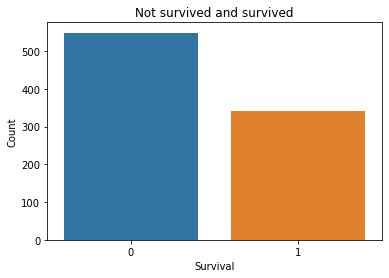

In [15]:
sns.countplot(data['Survived'])
plt.title('Not survived and survived')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()

In [16]:
first_class=(data['Pclass']==1).sum()
print('First Class: ', first_class)
second_class=(data['Pclass']==2).sum()
print('Second Class: ', second_class)
third_class=(data['Pclass']==3).sum()
print('Third Class: ', third_class)

First Class:  216
Second Class:  184
Third Class:  491


After making a piecart plot of the class distribution we saw that there were maximum number of people who were travelling in third class.

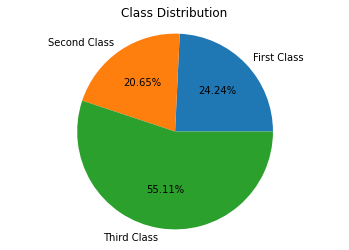

In [17]:
labels=['First Class','Second Class', 'Third Class']
sizes=[first_class, second_class, third_class]
plt.title('Class Distribution')
plt.pie(sizes,labels=labels, autopct='%1.2f%%')
plt.axis('equal')
plt.show()

According to the graph below we deduced the following info->
1) Number of people survived in the first class were greater than the number of people died in first class.
2) Number of people died in the second class were greater than the number of people survived in second class.
3) Number of people died in the third class were greater than the number of people survived in third class.


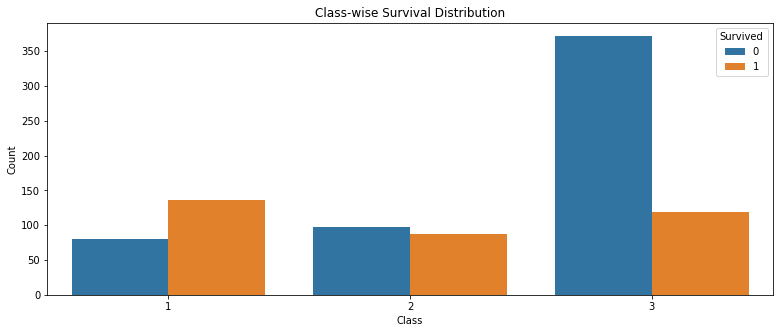

In [18]:
plt.figure(figsize=(13,5))
sns.countplot(x=data['Pclass'],hue=data['Survived'])
plt.title('Class-wise Survival Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

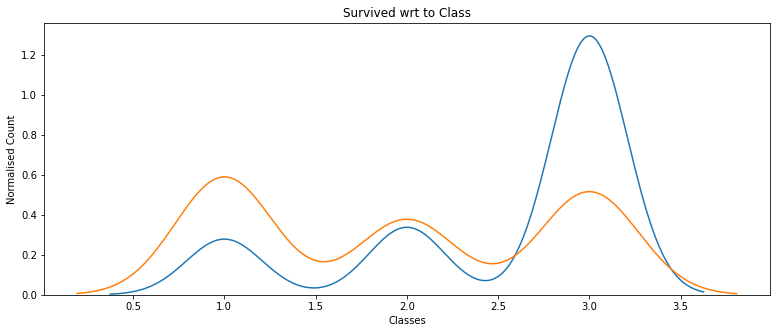

In [20]:
plt.figure(figsize=(13,5))
axs=sns.kdeplot(data.Pclass[data.Survived==0],label= 'Died')
axs=sns.kdeplot(data.Pclass[data.Survived==1], label='Survived')
plt.title('Survived wrt to Class')
plt.xlabel('Classes')
plt.ylabel('Normalised Count')
plt.show()

According to the below plot, we can say that there were maximum people of the age between 20 and 30.

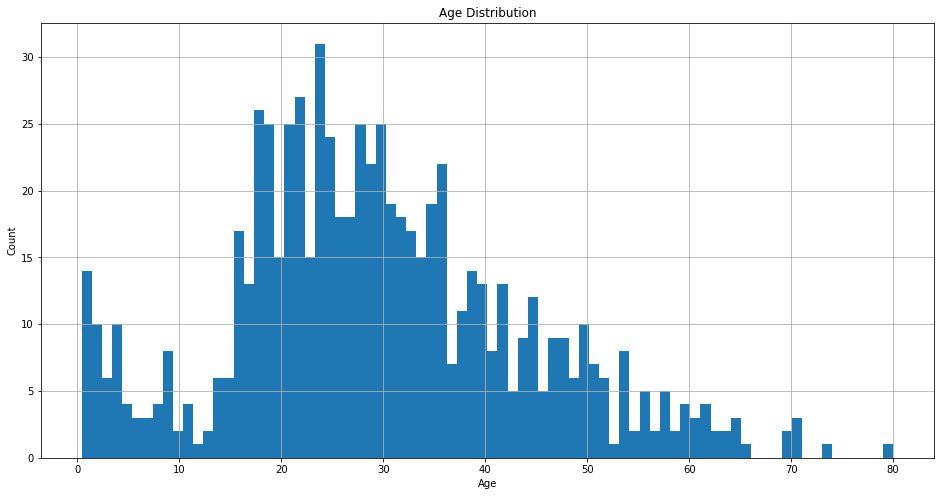

In [21]:
data.hist(column='Age',bins=80,figsize=(16,8))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

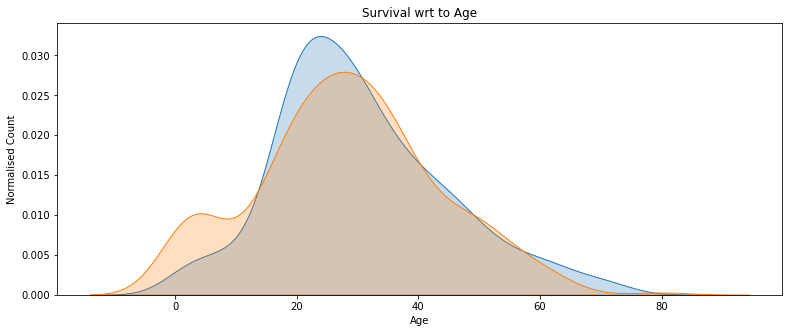

In [24]:
plt.figure(figsize=(13,5))
axs=sns.kdeplot(data.Age[data.Survived==0], shade=True, label='Died')
axs=sns.kdeplot(data.Age[data.Survived==1], shade=True, label='Survived')
plt.title('Survival wrt to Age')
plt.xlabel('Age')
plt.ylabel('Normalised Count')
plt.show()

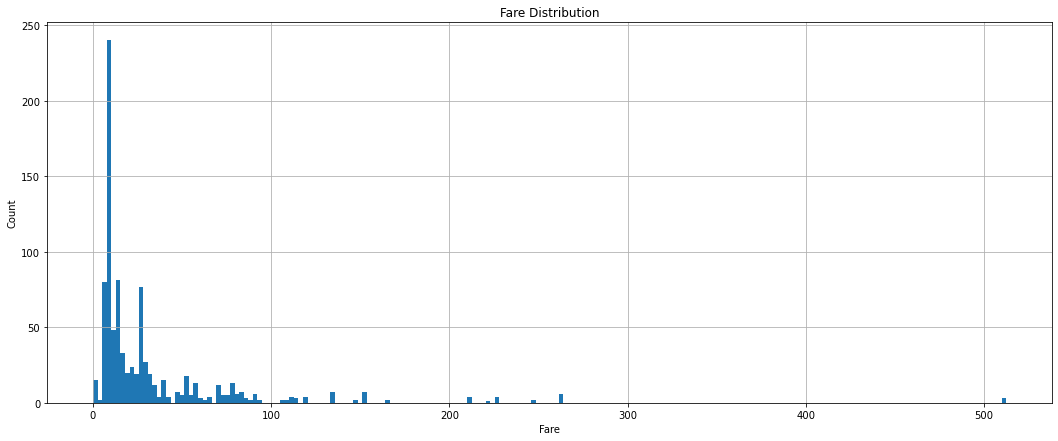

In [26]:
data.hist(column='Fare', bins=200,figsize=(18,7))
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [35]:
survived_above_500=((data['Fare']>=500) & (data['Survived']==1)).sum()
print("Number of people survived who paid fare more than 500: ", survived_above_500)

Number of people survived who paid fare more than 500:  3


In [31]:
data.loc[data.Fare>=500]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


As we saw that the average age was 29.7 and the average fare was 32.2, which can be seen in the graph as well.

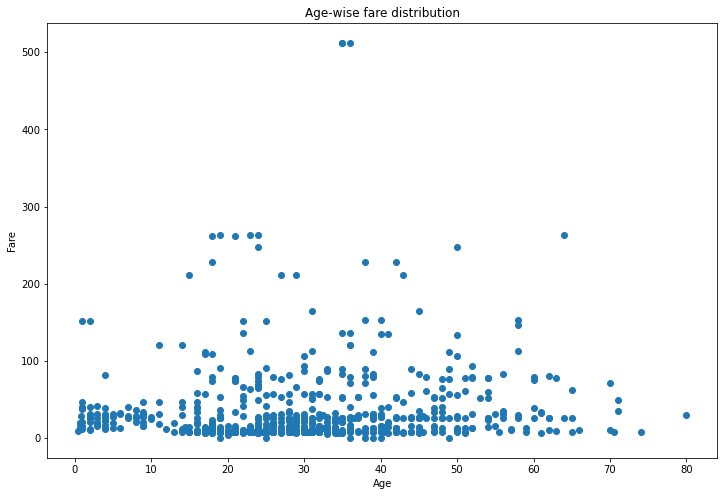

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(data['Age'], data['Fare'])
plt.title('Age-wise fare distribution')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [39]:
male_dead=((data['Sex']=='male') & (data['Survived']==0)).sum()
print("Number of men died: ", male_dead)
male_survived=((data['Sex']=='male') & (data['Survived']==1)).sum()
print("Number of men survived: ", male_survived)
female_dead=((data['Sex']=='female') & (data['Survived']==0)).sum()
print("Number of women died: ", female_dead)
female_survived=((data['Sex']=='female') & (data['Survived']==1)).sum()
print("Number of women survived: ", female_survived)

Number of men died:  468
Number of men survived:  109
Number of women died:  81
Number of women survived:  233


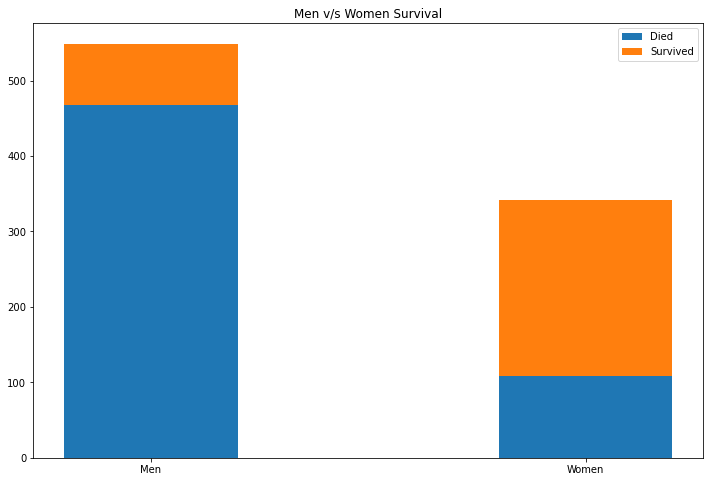

In [41]:
plt.figure(figsize=(12,8))
m_data=[male_dead, male_survived]
f_data=[female_dead, female_survived]
p1=plt.bar(np.arange(2), (m_data), width=0.4)
p2=plt.bar(np.arange(2),(f_data), bottom=m_data, width=0.4)
plt.xticks(np.arange(2),['Men','Women'])
plt.legend((p1[0],p2[0]),('Died','Survived'))
plt.title("Men v/s Women Survival")
plt.show()

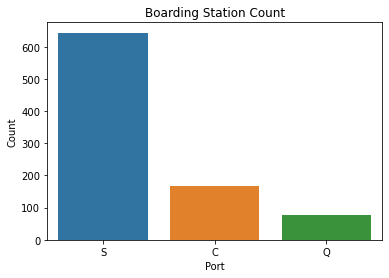

In [42]:
sns.countplot(x=data['Embarked'])
plt.title('Boarding Station Count')
plt.xlabel('Port')
plt.ylabel('Count')
plt.show()


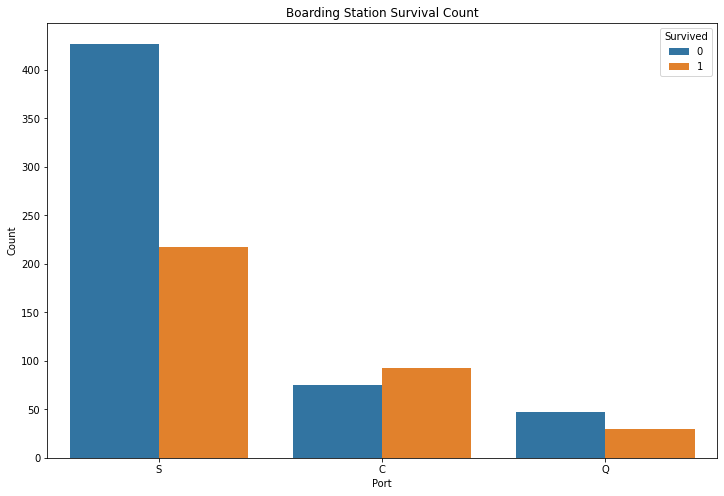

In [45]:
plt.figure(figsize=(12,8))
sns.countplot(x=data['Embarked'],hue=data['Survived'])
plt.title('Boarding Station Survival Count')
plt.xlabel('Port')
plt.ylabel('Count')
plt.show()

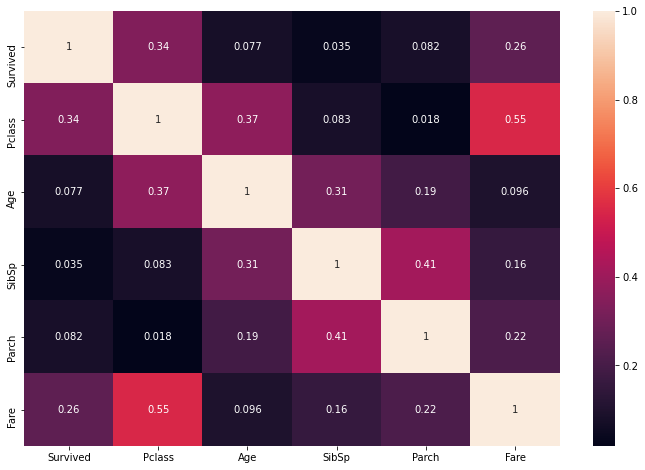

In [46]:
plt.figure(figsize=(12,8))
axs=sns.heatmap(data.corr().abs(), annot=True)
plt.show()

In [48]:
data['Sex']=data['Sex'].replace('male',1)
data['Sex']=data['Sex'].replace('female',0)
data['Embarked']=data['Embarked'].replace('C',1)
data['Embarked']=data['Embarked'].replace('S',2)
data['Embarked']=data['Embarked'].replace('Q',3)

We didn't get the 'sex' and'embarked' coumn in the above graph because it was a categorical data and not integer data. So we are converting it into integer values.


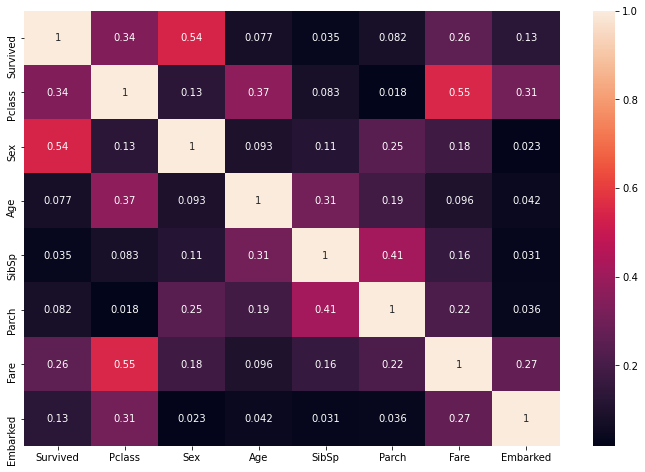

In [49]:
plt.figure(figsize=(12,8))
axs=sns.heatmap(data.corr().abs(), annot=True)
plt.show()